# STEP 1: DATA UNDERSTANDING

In [5]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn as ib
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [6]:

df = pd.read_excel("stroke.xlsx", sheet_name="data")

In [7]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,weight_in_kg,height_in_m,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,116.0,1.78,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,86.0,1.68,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.6,92.0,1.68,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.5,83.0,1.55,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,63.0,1.62,never smoked,1


### Find the number of NULL values in each column

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  196
weight_in_kg         732
height_in_m          732
smoking_status         0
stroke                 0
dtype: int64


<Axes: >

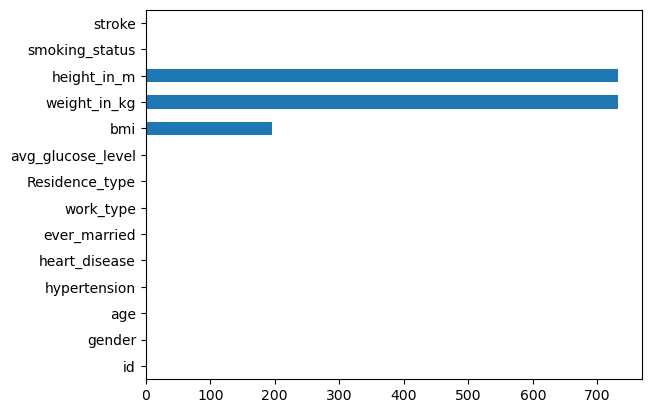

In [9]:

print(df.isna().sum())

df.isna().sum().plot.barh()

#BMI has less null than height and weight, so i donot consider the height and weight factor

In [11]:
df = df.drop(['weight_in_kg', 'height_in_m'], axis=1)
df = df.dropna(axis=1, how='all')

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  196
smoking_status         0
stroke                 0
dtype: int64


<Axes: >

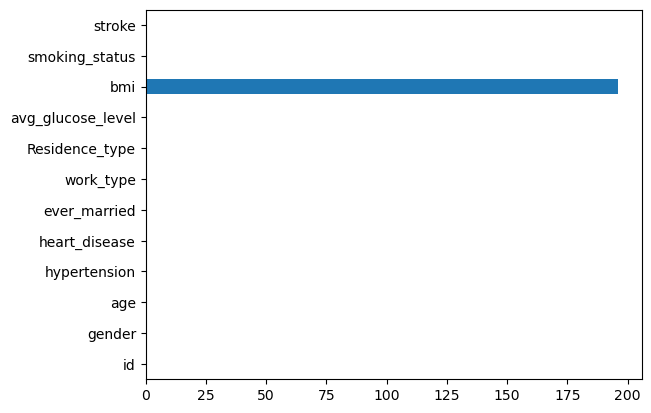

In [12]:
print(df.isna().sum())

df.isna().sum().plot.barh()

In [13]:

df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4914.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,27.567908,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,5.804427,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.100000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,27.700000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,31.600000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,50.400000,1.000000


In [14]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4914 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [15]:

df = df.drop(['id'],axis=1)


In [16]:

df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

<Axes: ylabel='count'>

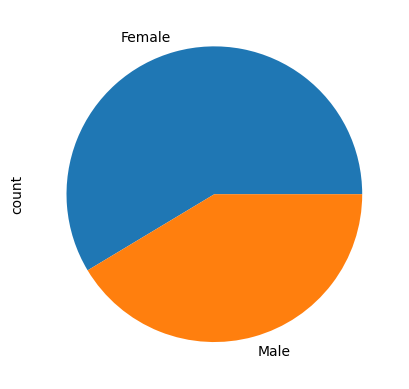

In [17]:

df['gender'] = df['gender'].replace('Other','Female')

df['gender'].value_counts().plot(kind="pie")

In [18]:

df['stroke'].value_counts()


stroke
0    4861
1     249
Name: count, dtype: int64

<Axes: xlabel='stroke'>

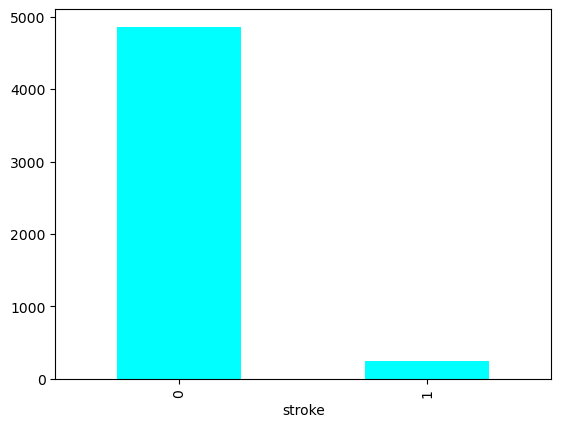

In [19]:

df['stroke'].value_counts().plot(kind="bar",color = "cyan")

In [20]:
print("% of people who actualy got a stroke : ",(df['stroke'].value_counts()[1]/df['stroke'].value_counts().sum()).round(3)*100)

% of people who actualy got a stroke :  4.9


<Axes: xlabel='hypertension'>

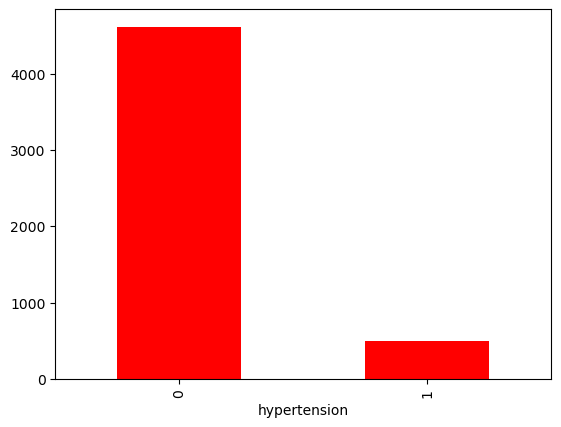

In [21]:

df['hypertension'].value_counts().plot(kind="bar",color = "red")

In [22]:

df['work_type'].value_counts()

work_type
Private          2924
Self-employed     819
children          688
Govt_job          657
Never_worked       22
Name: count, dtype: int64

<Axes: ylabel='count'>

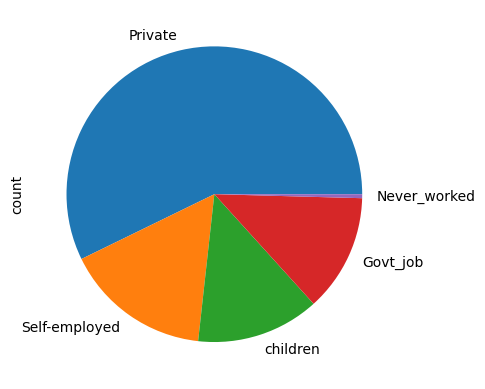

In [23]:

df['work_type'].value_counts().plot(kind="pie")

In [24]:

df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

<Axes: ylabel='count'>

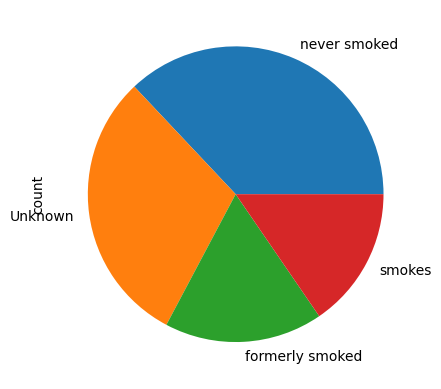

In [25]:

df['smoking_status'].value_counts().plot(kind="pie")

In [26]:

df['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

<Axes: ylabel='count'>

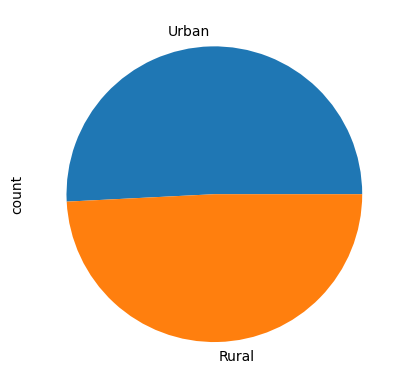

In [27]:

df['Residence_type'].value_counts().plot(kind="pie")

# STEP 2: DATA CLEANING AND STEP 3 DATA TRANSFORMATION

### BMI analysis

In [30]:

df['bmi'].isnull().sum()

196

<Axes: xlabel='bmi', ylabel='Count'>

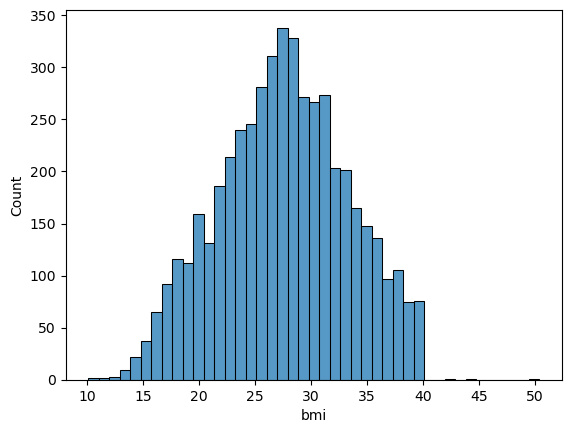

In [31]:

sns.histplot(data=df['bmi'])

* Bmi is rightly skewed

<Axes: ylabel='bmi'>

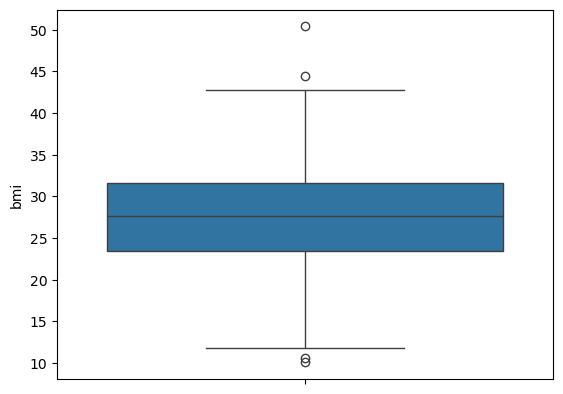

In [33]:
sns.boxplot(data=df['bmi'])

In [34]:

Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
# Finding IQR
IQR = Q3 - Q1
da=(df['bmi'] < (Q1 - 1.5 * IQR)) | (df['bmi'] > (Q3 + 1.5 * IQR))
da.value_counts()

bmi
False    5106
True        4
Name: count, dtype: int64

In [35]:

df['bmi'].isna().sum()/len(df['bmi'])*100

3.8356164383561646

In [36]:
df_na=df.loc[df['bmi'].isnull()]
g=df_na['stroke'].sum()
print("People who got stroke and their BMI is NA:",g)
h=df['stroke'].sum()
print("People who got stroke and their BMI is given:",h)
print("percentage of people with stroke in Nan values to the overall dataset:",g/h*100)

People who got stroke and their BMI is NA: 40
People who got stroke and their BMI is given: 249
percentage of people with stroke in Nan values to the overall dataset: 16.06425702811245


In [37]:

df['stroke'].sum()/len(df)*100

4.87279843444227

In [38]:

print("median of bmi",df['bmi'].median())
df['bmi']=df['bmi'].fillna(df['bmi'].median())
#fill the null of bmi using median

median of bmi 27.7


<Axes: xlabel='age', ylabel='Count'>

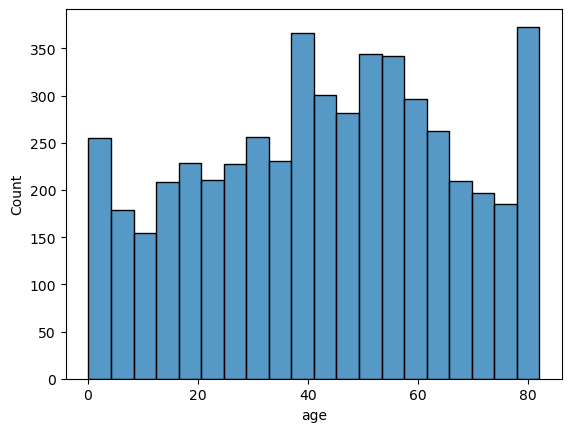

In [39]:

sns.histplot(data=df['age'])

<Axes: ylabel='age'>

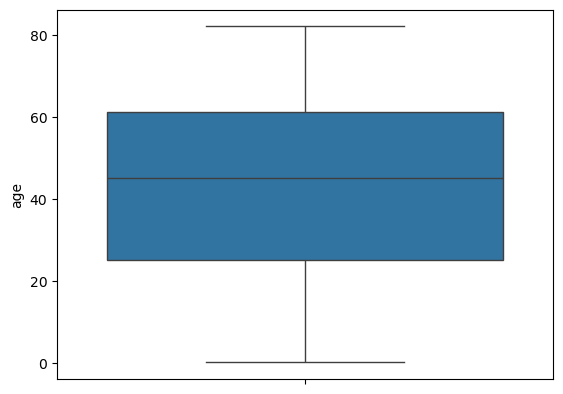

In [40]:
# boxplot
sns.boxplot(data=df['age'])

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

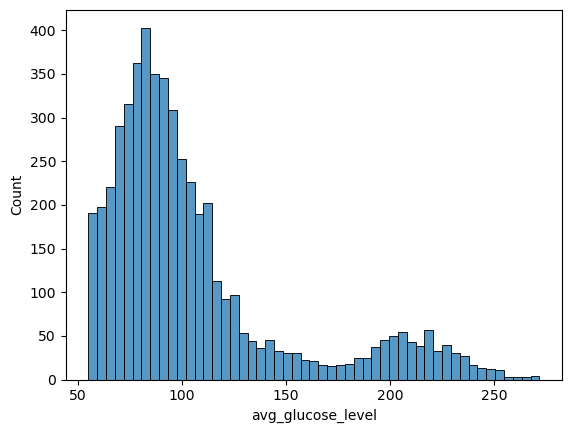

In [41]:

sns.histplot(data=df['avg_glucose_level'])

<Axes: ylabel='avg_glucose_level'>

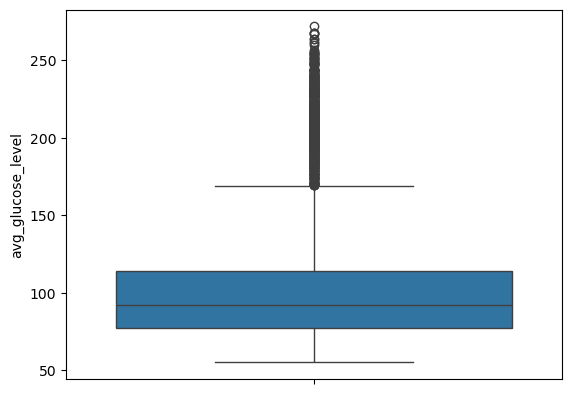

In [42]:

sns.boxplot(data=df['avg_glucose_level'])

In [43]:
Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
da=(df['avg_glucose_level'] < (Q1 - 1.5 * IQR)) | (df['avg_glucose_level'] > (Q3 + 1.5 * IQR))
da.value_counts()

avg_glucose_level
False    4483
True      627
Name: count, dtype: int64

<Axes: >

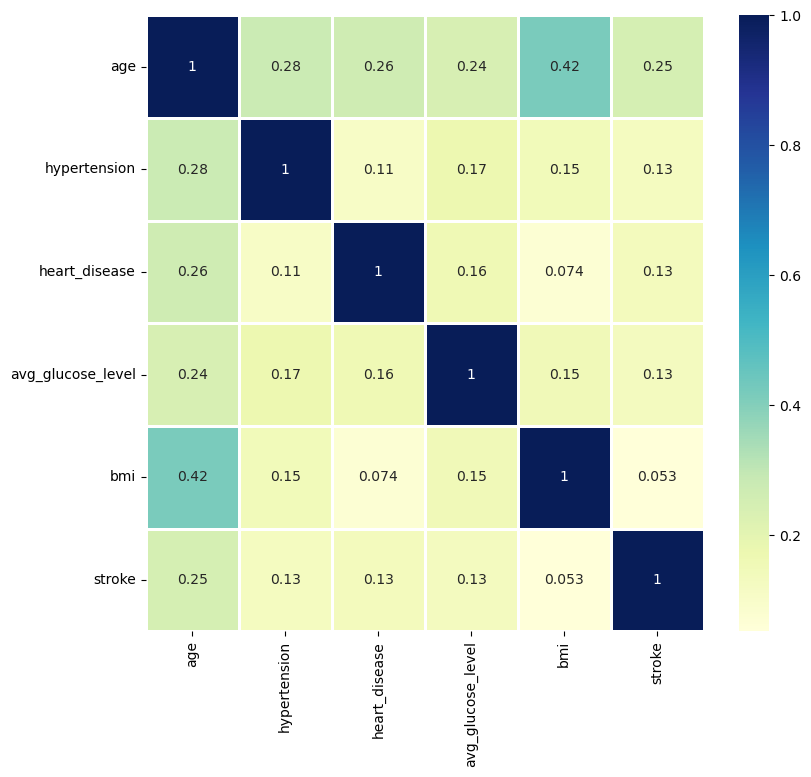

In [44]:

corrmat=df.corr(numeric_only=True)
f,ax=plt.subplots(figsize=(9,8))
sns.heatmap(corrmat,ax=ax,cmap="YlGnBu",linewidth=0.8,annot=True)

In [45]:

df['heart_disease'].value_counts()

heart_disease
0    4834
1     276
Name: count, dtype: int64

<Axes: ylabel='count'>

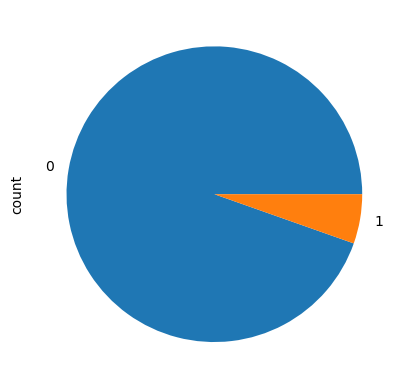

In [46]:
df['heart_disease'].value_counts().plot(kind="pie")

In [47]:
# Value count of evver married attribute
df['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

- This result shows that 65.62 % of people from the list are married and 34.38 % are unmarried.

<Axes: ylabel='count'>

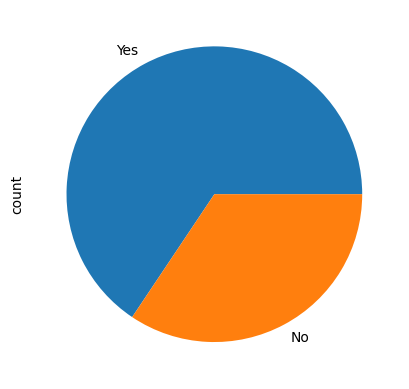

In [49]:
# Graphical representation
df['ever_married'].value_counts().plot(kind="pie")

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


<Axes: >

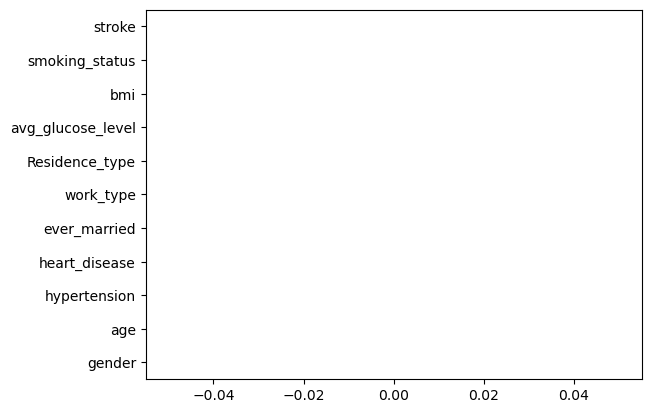

In [50]:
#check to ensure no null
print(df.isna().sum())

df.isna().sum().plot.barh()

# STEP 4 EXPLORATORY DATA ANALYSIS (EDA)

## Cross analysis - all the attribute compared with target attibute

<Axes: xlabel='stroke', ylabel='count'>

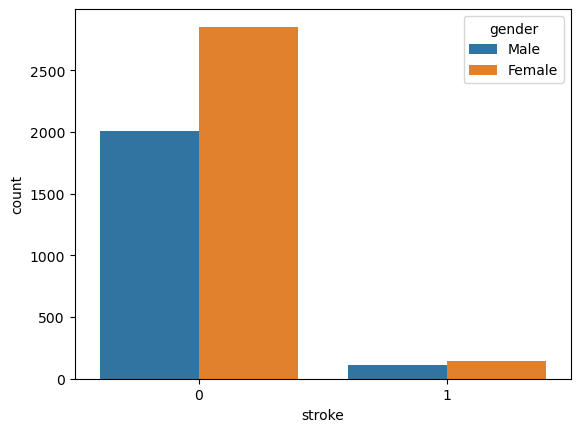

In [53]:
# Comparing stroke with gender
sns.countplot(x='stroke', hue='gender', data=df)

<Axes: xlabel='stroke', ylabel='count'>

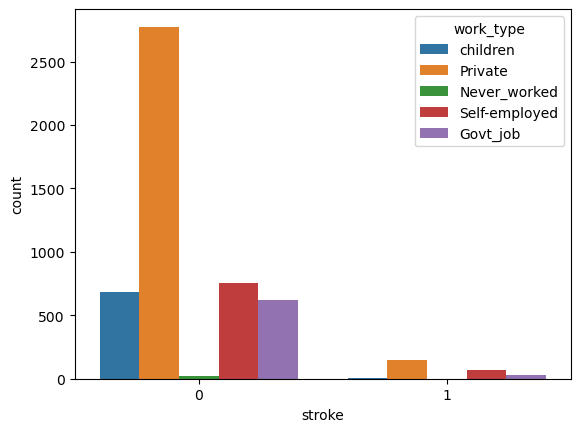

In [54]:
# Comparing stroke with work-type
sns.countplot(x='stroke', hue='work_type', data=df)

<Axes: xlabel='stroke', ylabel='count'>

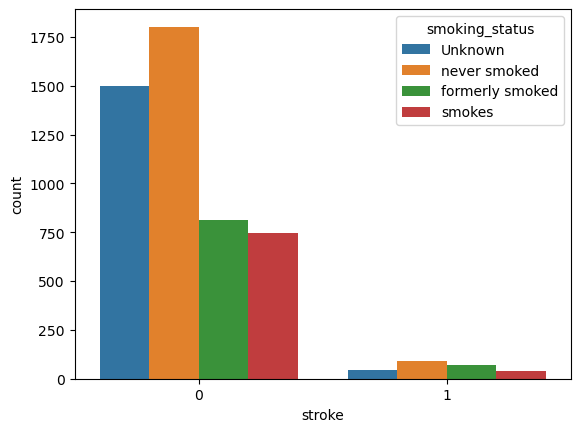

In [55]:
# Comparing stroke with somking_status
sns.countplot(x='stroke', hue='smoking_status', data=df)

* Based on the plot we can conclude that those who never smoked got more strokes,followed by formely smoked.

<Axes: xlabel='stroke', ylabel='count'>

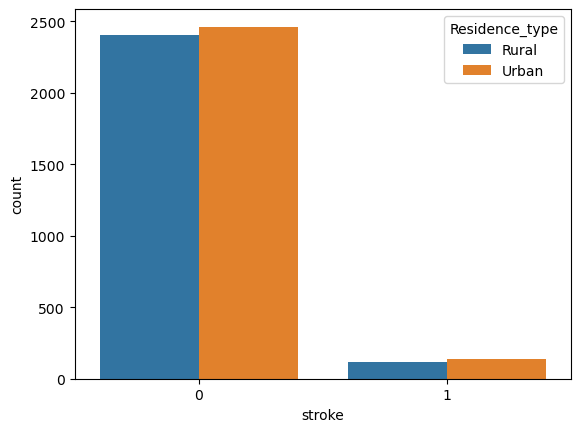

In [57]:
# Comparing stroke with residence type
sns.countplot(x='stroke', hue='Residence_type', data=df)

* Based on the analysis the people who live in Urban areas were reported with more strokes

<Axes: xlabel='stroke', ylabel='count'>

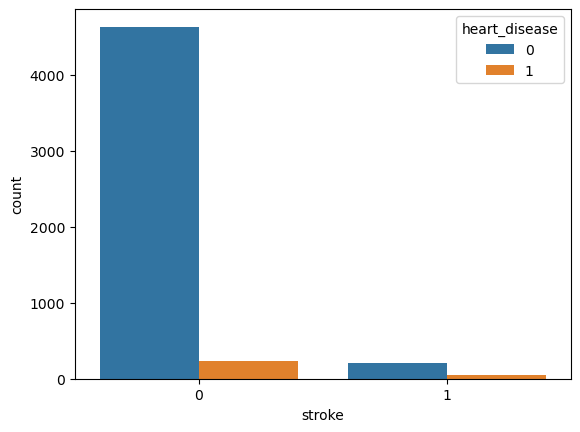

In [59]:
# Comparing stroke with heart disease
sns.countplot(x='stroke', hue='heart_disease', data=df)

* This plotting shows that the number of "people with Strokes but no heart disease" is much higher than the number of "people with Strokes and also heart disease". This shows most of the people with no heart disease are suffering with Strokes compared to the once who have Heart Disease.

<Axes: xlabel='stroke', ylabel='count'>

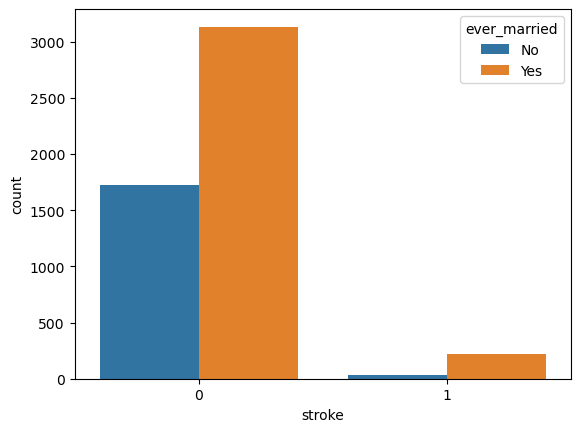

In [61]:
# Comparing stroke with married status
sns.countplot(x='stroke', hue='ever_married', data=df)

* This plotting shows that the number of "Married people with Strokes" is approximately 10 to 12 times the no. "Unmarried people with Strokes". 
* This shows most of the Married people got Strokes compared to Unmarried people.

### Creating dummy variables for numeric-binary attributes

In [64]:
# Converting numeric-binary value attributes to string
df[['hypertension', 'heart_disease', 'stroke']] = df[['hypertension', 'heart_disease', 'stroke']].astype(str)
# Generating dummy attributes - one hot encoding format
df = pd.get_dummies(df, drop_first= True)


In [65]:
# The data frame after performing dummy attributes
df.head()

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,67.0,228.69,36.6,True,False,True,True,False,True,False,False,True,True,False,False,True
1,61.0,202.21,27.7,False,False,False,True,False,False,True,False,False,False,True,False,True
2,80.0,105.92,32.6,True,False,True,True,False,True,False,False,False,False,True,False,True
3,49.0,171.23,34.5,False,False,False,True,False,True,False,False,True,False,False,True,True
4,79.0,174.12,24.0,False,True,False,True,False,False,True,False,False,False,True,False,True


In [66]:
# Since our Dataset is highly undersampled (based on target instances) we are going to perform a over sampling method to have equal representation of both the target classes
# Using random oversampling - importing the library 
from imblearn.over_sampling import RandomOverSampler

# Performing a minority oversampling
oversample = RandomOverSampler(sampling_strategy='minority')
X=df.drop(['stroke_1'],axis=1)
y=df['stroke_1']

# Obtaining the oversampled dataframes - testing and training
X_over, y_over = oversample.fit_resample(X, y)

In [67]:
# importing a scaling modeule
from sklearn.preprocessing import StandardScaler

# Since the numeric attributes in the dataset is in different ranges and three are outliers persent we are usign a scaler to get all the values into the same range.
s = StandardScaler()
# Scaling the numeric attributes
df[['bmi', 'avg_glucose_level', 'age']] = s.fit_transform(df[['bmi', 'avg_glucose_level', 'age']])

# STEP 5 DATA SPLITTING

### Creating test-train split (70-30 split)

In [70]:
# creating dataset split for training and testing the model
from sklearn.model_selection import train_test_split
# Performing a 80-20 test-train split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.30, random_state= 42)

In [71]:
# Checking the size of the splits 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (6805, 15)
y_train: (6805,)
X_test: (2917, 15)
y_test: (2917,)


# STEP 6 AND 7: BASELINE MODEL AND EVALUATE THE MODEL

### Decision Tree

In [74]:
#importing the Decision Tree Classifier module
from sklearn.tree import DecisionTreeClassifier
# Libraries for calculating performance metrics
from sklearn import metrics 
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

# Create the classifier object
clf = DecisionTreeClassifier()

# Training the classifier
clf = clf.fit(X_train,y_train)

#predicting result using the test dataset
y_pred = clf.predict(X_test)

# Printing the accuracyof the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9736030167980803


C:\Users\60139\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:17:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


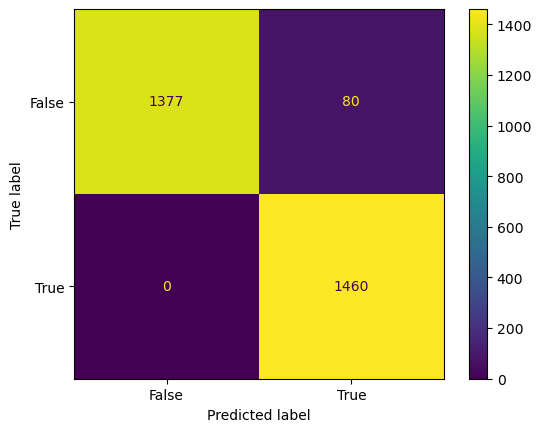

In [75]:
# Plotting the confusion matrix of the model
from sklearn.metrics import ConfusionMatrixDisplay,precision_recall_fscore_support
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=True, eval_metric='logloss')
xgb.fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(xgb,X_test,y_test)

In [76]:
# Printing the precision,recall,f1score and support values of the model based on the confusion matrix
y_pred_xgb = xgb.predict(X_test)
y_pred_prob_xgb = xgb.predict_proba(X_test)
y_test_binary = y_test  # Assuming y_test is already in binary format (0 or 1)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
print("Accuracy_score:",accuracy_score(y_test,y_pred_xgb))
print("Precision_score:",precision_score(y_test,y_pred_xgb))
print("Recall_score:",recall_score(y_test,y_pred_xgb))
print("f1_score:",f1_score(y_test,y_pred_xgb))
print('ROC AUC Score:', roc_auc_score(y_test_binary, y_pred_prob_xgb[:, 1]))

Accuracy_score: 0.9725745629070963
Precision_score: 0.948051948051948
Recall_score: 1.0
f1_score: 0.9733333333333334
ROC AUC Score: 0.9994504564643054


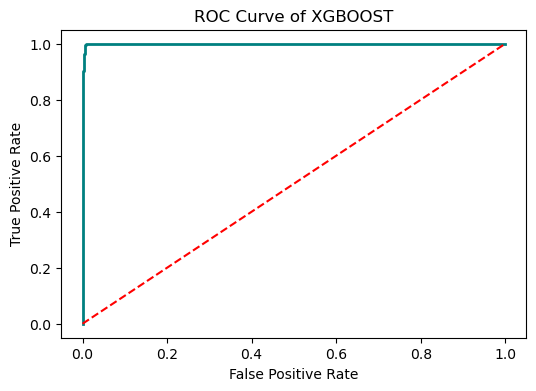

In [77]:
# plots of roc_auc 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_xgb[:, 1])

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2, color= 'teal')
plt.plot([0,1], [0,1], 'r--' )
plt.title('ROC Curve of XGBOOST')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [78]:
ac_dt=accuracy_score(y_test,y_pred_xgb)
ac_dt

0.9725745629070963

### Random Forest

In [80]:

# importing random forest classifier module for training
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create the classifier object
rf_clf = RandomForestClassifier(n_estimators = 100)

# Train the model using the training sets
rf_clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred_rf = rf_clf.predict(X_test)

# Printing accuracy of the model
print('Accuracy:', accuracy_score(y_test, y_pred_rf))



Accuracy: 0.990743914981145


In [81]:
# Importing module for kfold cross validation
from sklearn import model_selection
from sklearn.model_selection import KFold

# Performing k fold cross validation using 20 splits
kfold_kridge = model_selection.KFold(n_splits=20, shuffle=True)
results_kfold = model_selection.cross_val_score(rf_clf, X_over, y_over, cv=kfold_kridge)
print("Accuracy: ", results_kfold.mean()*100)
print(results_kfold)

Accuracy:  99.3622032938711
[0.99589322 0.99794661 0.98353909 0.99176955 0.99382716 0.99794239
 0.98765432 0.99176955 0.99588477 0.99588477 0.99794239 0.98971193
 0.99176955 0.99382716 0.99794239 0.99794239 0.99176955 0.98971193
 0.98971193 1.        ]


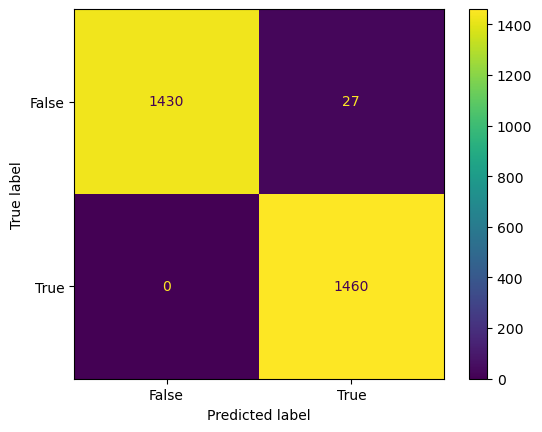

In [82]:
# Plotting the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay,precision_recall_fscore_support
ConfusionMatrixDisplay.from_estimator(rf_clf,X_test,y_test)

In [83]:
ac_rf=accuracy_score(y_test, y_pred_rf)
ac_rf

0.990743914981145

# Naive Bayes

In [85]:
# For the front end 
import pickle

with open('model.pickle','wb') as f:
  pickle.dump(rf_clf,f)

In [86]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))

Naive Bayes Accuracy: 0.6804936578676722
              precision    recall  f1-score   support

       False       0.99      0.37      0.53      1457
        True       0.61      0.99      0.76      1460

    accuracy                           0.68      2917
   macro avg       0.80      0.68      0.65      2917
weighted avg       0.80      0.68      0.65      2917



In [87]:
### Artificial Neural Network (ANN)
ann_model = Sequential()
ann_model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
ann_model.add(Dense(16, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
ann_pred = (ann_model.predict(X_test) > 0.5).astype("int32")
print("ANN Accuracy:", accuracy_score(y_test, ann_pred))
print(classification_report(y_test, ann_pred))

Epoch 1/50


C:\Users\60139\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5930 - loss: 4.7222 - val_accuracy: 0.7546 - val_loss: 0.5042
Epoch 2/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.7562 - loss: 0.5105 - val_accuracy: 0.7267 - val_loss: 0.5126
Epoch 3/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.7430 - loss: 0.5166 - val_accuracy: 0.7517 - val_loss: 0.5154
Epoch 4/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.7510 - loss: 0.4987 - val_accuracy: 0.7605 - val_loss: 0.5017
Epoch 5/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.7526 - loss: 0.5213 - val_accuracy: 0.7796 - val_loss: 0.4853
Epoch 6/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.7524 - loss: 0.4948 - val_accuracy: 0.7774 - val_loss: 0.4803
Epoch 7/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.7514 - loss: 0.5058 - val_accuracy: 0.7568 - val_loss: 0.4978
Epoch 8/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.7592 - loss: 0.4987 - val_accuracy:

In [88]:
ac_nb=accuracy_score(y_test, nb_pred)
ac_nb

0.6804936578676722

# KNN

In [90]:
#importing the KNN Classifier module
from sklearn.neighbors import KNeighborsClassifier
# Libraries for calculating performance metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

# Create the classifier object
# 2 neighbours because of the 2 classes
knn = KNeighborsClassifier(n_neighbors = 2)
# Training the classifier
knn.fit(X_train,y_train)
#predicting result using the test dataset
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

# Printing the accuracy and roc-auc score of the model
confusion_matrix(y_test, y_pred_knn)
print('Accuracy:',accuracy_score(y_test, y_pred_knn))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_knn))

Accuracy: 0.9729173808707576
ROC AUC Score: 0.9728894989704873


In [91]:
ac_knn=accuracy_score(y_test, y_pred_knn)
ac_knn

0.9729173808707576

# SUMMARY

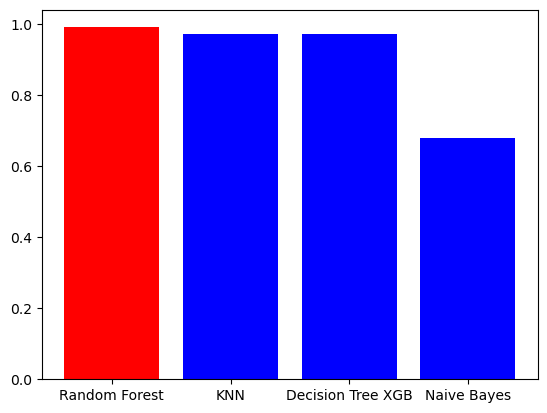

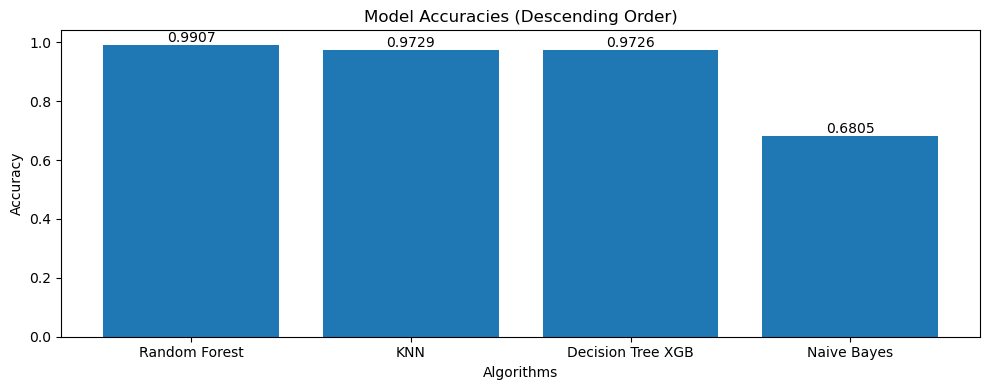

In [93]:
algorithms = ['Decision Tree XGB','Random Forest','Naive Bayes','KNN']
accuracies = [ac_dt,ac_rf,ac_nb,ac_knn]

# Create lists of tuples and sort in descending order
algo_acc_pairs = list(zip(algorithms, accuracies))
algo_acc_pairs.sort(key=lambda x: x[1], reverse=True)

# Unzip the sorted pairs
sorted_algorithms, sorted_accuracies = zip(*algo_acc_pairs)
bars = plt.bar(sorted_algorithms, sorted_accuracies,color=['red' if i == 0 else 'blue' for i in range(len(sorted_algorithms))])

# Plot with sorted values
plt.figure(figsize=(10, 4))
plt.bar(sorted_algorithms, sorted_accuracies)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Model Accuracies (Descending Order)")
# Add value labels on top of each bar with 4 decimal precision
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [94]:
highest_accuracy_index = sorted_accuracies.index(max(sorted_accuracies))
highest_accuracy_algorithm = sorted_algorithms[highest_accuracy_index]
highest_accuracy_value = sorted_accuracies[highest_accuracy_index]

print(f"The highest accuracy model is {highest_accuracy_algorithm} with an accuracy of {highest_accuracy_value:.4f}.")

The highest accuracy model is Random Forest with an accuracy of 0.9907.


In [199]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

# Initialize models
models = {
    "Decision Tree": make_pipeline(StandardScaler(), DecisionTreeClassifier()),
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    "Naive Bayes": make_pipeline(StandardScaler(), GaussianNB()),
    "Random Forest": make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100)),
    "KNN": make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
}

# Dictionary to store model results
model_results = {}
categorical_columns = X_train_over.select_dtypes(include=['object']).columns


# Apply Label Encoding to each categorical column
label_encoder = LabelEncoder()
for col in categorical_columns:
    X_train_over[col] = label_encoder.fit_transform(X_train_over[col])
    X_test[col] = label_encoder.transform(X_test[col])



In [217]:
numerical_attributes = [
    'age', 'avg_glucose_level', 'bmi'
]
scaler = StandardScaler()
scaled_columns = [f"{col}_scaled" for col in numerical_attributes]  
df[scaled_columns] = scaler.fit_transform(df[numerical_attributes])

# Plot ROC curves
plt.figure(figsize=(10, 6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_pred_prob):.2f})")

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<Figure size 1000x600 with 0 Axes>